# Biomass segmentation
Team: Nikita Stasenko, Kiseleva Elizaveta, Markov Igor, Vypiraylenko Dmitry, Oluwafemi Olaleke
![alt text](https://graftedgrowers.com/wp-content/uploads/2019/04/grafted-growers-tomato-plants-raleigh.jpg)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# !unzip Tomato_1.zip

from IPython.display import clear_output
clear_output()

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [ ]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

## Example on 1 photo
The main idea is to find all the green pixels in the picture. Find the red square and compare their area. For this, we use simple computer vision techniques.

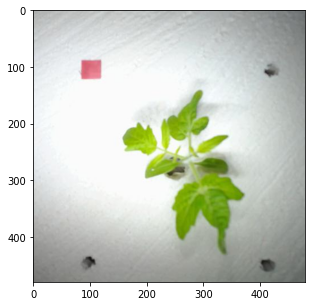

In [ ]:
tomato = cv2.imread('1/ImageSet_Oct_01_04_03_00.jpg')
tomato = cv2.cvtColor(tomato, cv2.COLOR_BGR2RGB)
plt.imshow(tomato)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(tomato)

pixel_colors = tomato.reshape((np.shape(tomato)[0]*np.shape(tomato)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
hsv_tomato = cv2.cvtColor(tomato, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_tomato)

In [ ]:
dark_green = (60, 255, 255)
light_green = (20, 100,  60)

In [ ]:
from matplotlib.colors import hsv_to_rgb
def color_check(light, dark):
    rcParams['figure.figsize'] = 5, 2

    lg_square = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
    dg_square = np.full((10, 10, 3), dark, dtype=np.uint8) / 255.0

    # print(lg_square, dg_square)

    plt.subplot(1, 2, 1)
    plt.imshow(hsv_to_rgb(dg_square))
    plt.subplot(1, 2, 2)
    plt.imshow(hsv_to_rgb(lg_square))
    plt.show()

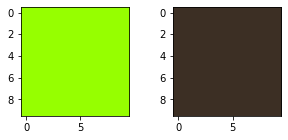

In [ ]:
color_check(light_green, dark_green)

In [ ]:
def show_result(mask, result, tomato):
    rcParams['figure.figsize'] = 15, 5
    plt.subplot(1, 3, 1)
    plt.imshow(mask, cmap="gray")
    plt.subplot(1, 3, 2)
    plt.imshow(result)
    plt.subplot(1, 3, 3)
    plt.imshow(tomato)
    plt.show()

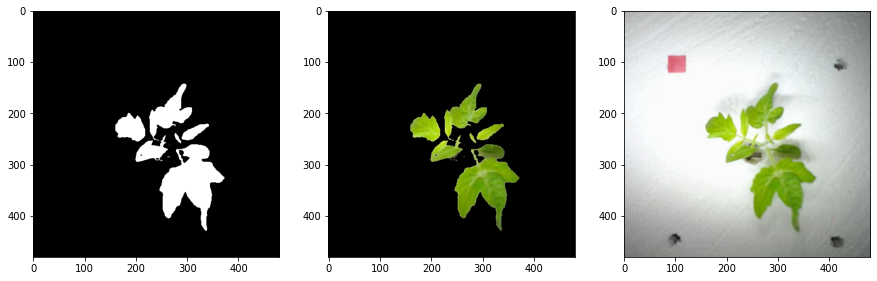

In [ ]:
mask = cv2.inRange(hsv_tomato, light_green, dark_green)
result = cv2.bitwise_and(tomato, tomato, mask=mask)
show_result(mask, result, tomato)

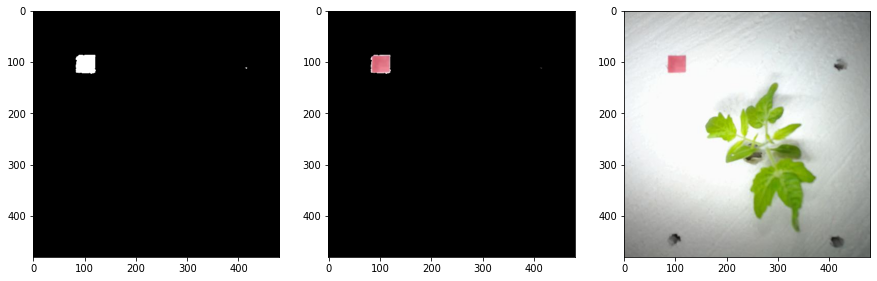

In [ ]:
dark_red = (255, 255, 255)
light_red = (170, 10, 5)

mask = cv2.inRange(hsv_tomato, light_red, dark_red)
result_rect = cv2.bitwise_and(tomato, tomato, mask=mask)
show_result(mask, result_rect, tomato)

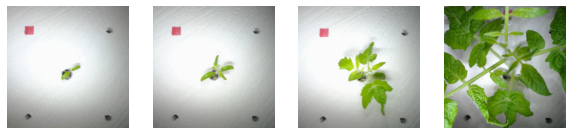

In [ ]:
tomato_1 = cv2.imread('1/ImageSet_Sep_19_14_36_08.jpg')
tomato_1 = cv2.cvtColor(tomato_1, cv2.COLOR_BGR2RGB)

tomato_2 = cv2.imread('1/ImageSet_Sep_24_01_24_06.jpg')
tomato_2 = cv2.cvtColor(tomato_2, cv2.COLOR_BGR2RGB)

tomato_3 = cv2.imread('1/ImageSet_Oct_01_04_03_00.jpg')
tomato_3 = cv2.cvtColor(tomato_3, cv2.COLOR_BGR2RGB)

tomato_4 = cv2.imread('1/ImageSet_Oct_11_12_02_16.jpg')
tomato_4 = cv2.cvtColor(tomato_4, cv2.COLOR_BGR2RGB)

rcParams['figure.figsize'] = 10, 10
plt.subplot(1, 4, 1)
plt.imshow(tomato_1)
plt.axis("off")
plt.subplot(1,4, 2)
plt.imshow(tomato_2)
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(tomato_3)
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(tomato_4)
plt.axis("off")
plt.show()

In [ ]:
rect_area = cv2.countNonZero(cv2.cvtColor(result_rect, cv2.COLOR_RGB2GRAY))

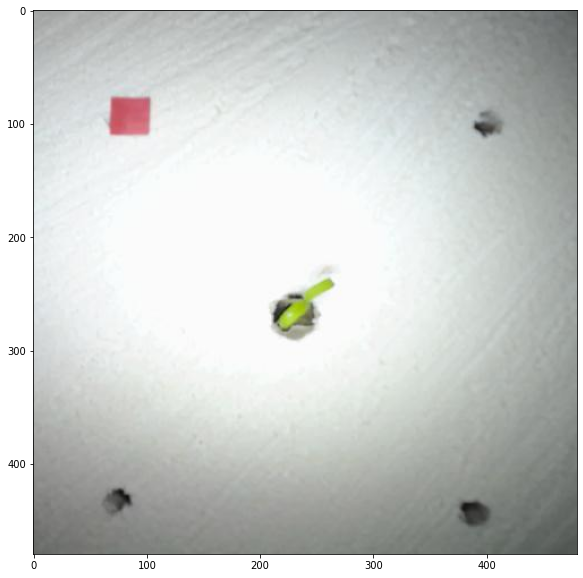

In [ ]:
tomato = cv2.imread('1/ImageSet_Sep_17_20_04_15.jpg')
tomato = cv2.cvtColor(tomato, cv2.COLOR_BGR2RGB)
plt.imshow(tomato)
plt.show()

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(tomato)

pixel_colors = tomato.reshape((np.shape(tomato)[0]*np.shape(tomato)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
hsv_tomato = cv2.cvtColor(tomato, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_tomato)

In [ ]:
def count_pix(tomato, hsv_tomato, rect_area, show, verbose):
  
    mask_green = cv2.inRange(hsv_tomato, light_green, dark_green)
  
    result = cv2.bitwise_and(tomato, tomato, mask=mask_green)
  
    res_gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)

    area_cm2 = cv2.countNonZero(res_gray)/rect_area
    if verbose:
        print('Leaf area in pixels', cv2.countNonZero(res_gray))
        print('Leaf area in cm2', area_cm2)
    if show:
        show_result(mask_green, result, tomato)
    return cv2.countNonZero(res_gray), area_cm2


Leaf area in pixels 647
Leaf area in cm2 0.48683220466516175


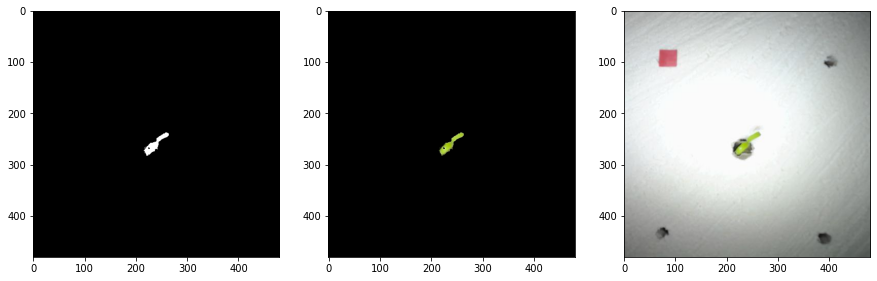

(647, 0.48683220466516175)

In [ ]:
count_pix(tomato, hsv_tomato, rect_area, show=True, verbose=True)

## Application to the entire dataset
Since the images due to the name were not kept in order, we separately consider the area of tomatoes in September and October.

In [ ]:
def make_hsv_tomato(name):
    tomato = cv2.imread(name)
    tomato = cv2.cvtColor(tomato, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(tomato)
    
    pixel_colors = tomato.reshape((np.shape(tomato)[0]*np.shape(tomato)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    hsv_tomato = cv2.cvtColor(tomato, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_tomato)
    return tomato, hsv_tomato

In [ ]:
root = '1'
september = []
october = []
import os
import pandas as pd
from IPython import display
for name in sorted(os.listdir(root)):
    if name.split('_')[1] == 'Sep':
        september.append(name)
    else:
        october.append(name)

In [ ]:
september[:5]

['ImageSet_Sep_16_21_27_40.jpg',
 'ImageSet_Sep_16_21_59_59.jpg',
 'ImageSet_Sep_16_22_32_17.jpg',
 'ImageSet_Sep_16_23_04_35.jpg',
 'ImageSet_Sep_16_23_36_54.jpg']

In [ ]:
rect_area = 1329

Leaf area in pixels 16897
Leaf area in cm2 12.714070729872084


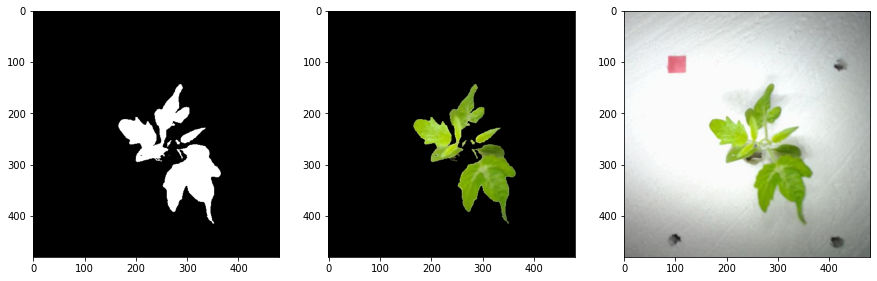

In [ ]:
pix_squares_september = []
cm2_squares_september = []
for i, name in enumerate(september):
    a, b = make_hsv_tomato('1/'+name)
    if i%30 == 0:
        display.clear_output(wait=True)
        c, d = count_pix(a, b, rect_area, show=True, verbose=True)
    else:
        c, d = count_pix(a, b, rect_area, show=False, verbose=False)
    pix_squares_september.append(c)
    cm2_squares_september.append(d)
    
    

Leaf area in pixels 110610
Leaf area in cm2 83.22799097065463


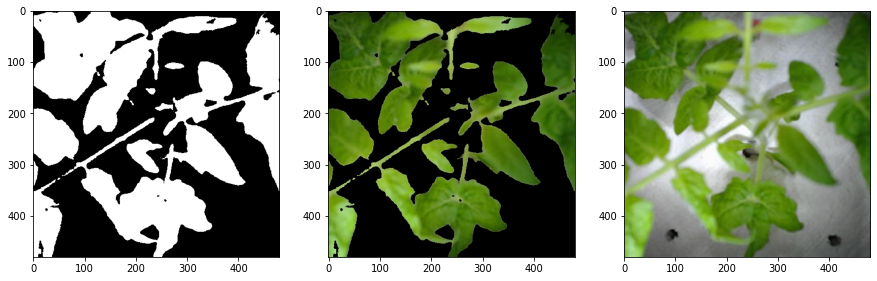

In [ ]:
pix_squares_october = []
cm2_squares_october = []
for i, name in enumerate(october):
    a, b = make_hsv_tomato('1/'+name)
    if i%30 == 0:
        display.clear_output(wait=True)
        c, d = count_pix(a, b, rect_area, show=True, verbose=True)
    else:
        c, d = count_pix(a, b, rect_area, show=False, verbose=False)
    pix_squares_october.append(c)
    cm2_squares_october.append(d)
    
    

In [ ]:
september[:5]

['ImageSet_Sep_16_21_27_40.jpg',
 'ImageSet_Sep_16_21_59_59.jpg',
 'ImageSet_Sep_16_22_32_17.jpg',
 'ImageSet_Sep_16_23_04_35.jpg',
 'ImageSet_Sep_16_23_36_54.jpg']

In [ ]:
months = []
days = []
hours = []
minutes = []
names = september + october
for name in names:
    fig = name.split('_')
    month, day, hour, minute = fig[1:5]
    months.append(month)
    days.append(day)
    hours.append(hour)
    minutes.append(minute)

In [ ]:
pix_squares = pix_squares_september + pix_squares_october
cm2_squares = cm2_squares_september + cm2_squares_october

In [ ]:
leaves_growth = pd.DataFrame(data = {'Pixel square': pix_squares,
                                        'Cm2 square':cm2_squares, 
                                        'Month':months,
                                        'Day': days,
                                        'Hours': hours,
                                        'Minutes' : minutes})

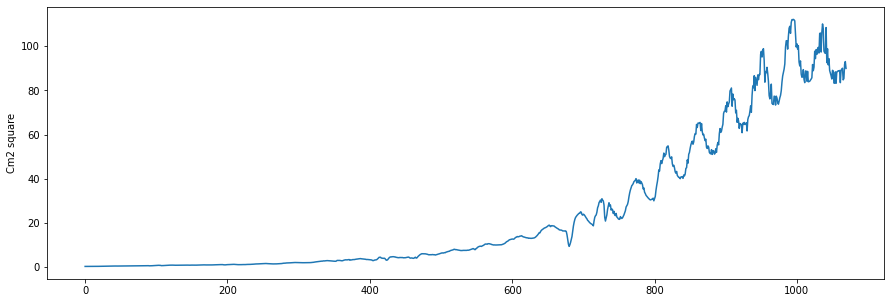

In [ ]:
plt.plot(leaves_growth['Cm2 square'])
plt.ylabel('Cm2 square')
plt.show()

This periodic change in area may be due to the time of day and the surrounding conditions at that moment. The more leaves, the brighter it is manifested. This is confirmed by the graph below. We see that in the period 7pm - 2am - a peak in the size of the leaves. From 6am-3pm on the contrary, the lowest values. This is a very interesting phenomenon. Most likely related to growing conditions.

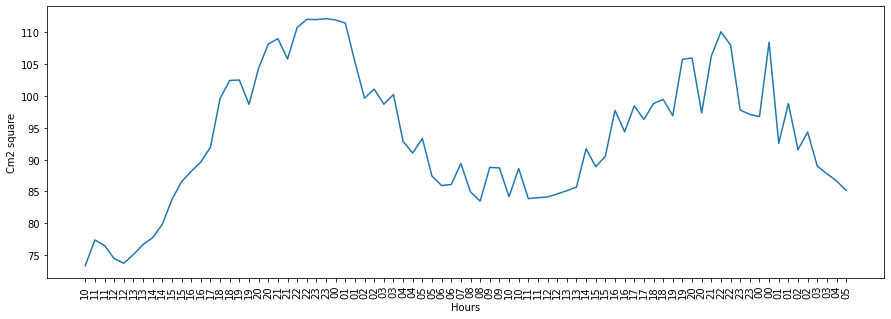

In [ ]:
plt.plot(leaves_growth['Cm2 square'][970:1050])
plt.xticks(range(970,1050), leaves_growth['Hours'][970:1050], rotation = 90)
plt.xlabel('Hours')
plt.ylabel('Cm2 square')
plt.show()